<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.





In [ ]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pylab as plt
import scipy as sc

In [ ]:
#Lista de valores de tiempo y corriente
t=np.array([1.00,1.01,1.02,1.03,1.04])
i=np.array([3.10,3.12,3.14,3.18,3.24])

Construya Data Frame de pandas con los valores de tiempo de corriente

In [ ]:
#Creación de un diccionario
dicc={"t":t,"i":i}

In [ ]:
df=pd.DataFrame(dicc)
df

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


Emplee un método calcular la derivada numérica

In [ ]:
#Derivada de tiempo
np.diff(t)

array([0.01, 0.01, 0.01, 0.01])

In [ ]:
#Derivada de la corriente
np.diff(i)

array([0.02, 0.02, 0.04, 0.06])

In [ ]:
#Calculo de la derivada
dev=np.diff(i)/np.diff(t)
dev

array([2., 2., 4., 6.])

In [ ]:
#Proceso de eliminar un punto
t_=np.delete(t,4)
t_

array([1.  , 1.01, 1.02, 1.03])

In [ ]:
i_=np.delete(i,4)

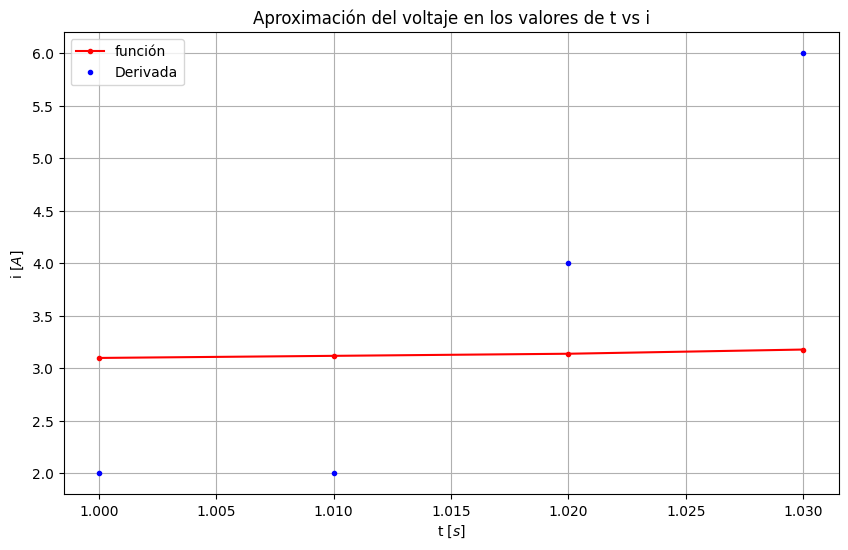

In [ ]:
#Gráfica
plt.figure(figsize=(10,6))
plt.plot(t_, i_ , ".-r", label="función")
plt.plot(t_,dev,".b", label="Derivada")
plt.xlabel("t $[s]$")
plt.ylabel("i $[A]$")
plt.legend()
plt.title("Aproximación del voltaje en los valores de t vs i")
plt.grid(True)
plt.show()

In [ ]:
#Método 2 trabajo con promedios
corriente_promedio=(i[0:4]+i[1:])/2
tiempo_promedio=(t[0:4]+t[1:])/2
print(corriente_promedio)
print(tiempo_promedio)

[3.11 3.13 3.16 3.21]
[1.005 1.015 1.025 1.035]


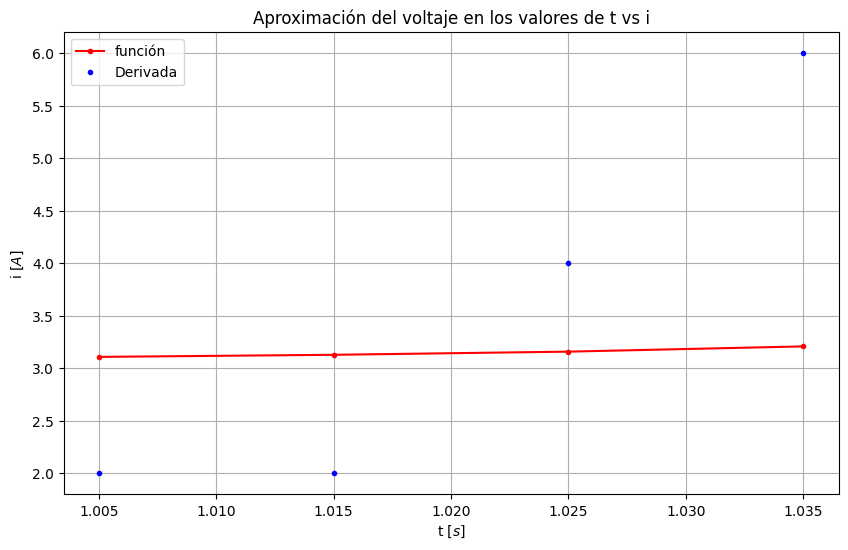

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(tiempo_promedio, corriente_promedio , ".-r", label="función")
plt.plot(tiempo_promedio,dev,".b", label="Derivada")
plt.xlabel("t $[s]$")
plt.ylabel("i $[A]$")
plt.legend()
plt.title("Aproximación del voltaje en los valores de t vs i")
plt.grid(True)
plt.show()

In [ ]:
#Tabla de datos obtenidos
R=0.142
L=0.98
fem=L*dev+R*corriente_promedio

In [ ]:
dicc_datos={"Tiempo(s)":tiempo_promedio,"corriente(A)":corriente_promedio,"derivada numérica":dev,"FEM(v)":fem}
df2=pd.DataFrame(dicc_datos)
df2

,Tiempo(s),corriente(A),derivada numérica,FEM(v)
0,1.005,3.11,2.0,2.40162
1,1.015,3.13,2.0,2.40446
2,1.025,3.16,4.0,4.36872
3,1.035,3.21,6.0,6.33582


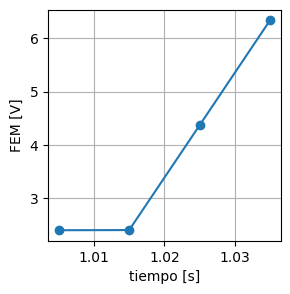

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(df2["Tiempo(s)"],df2["FEM(v)"],"-o")
plt.xlabel("tiempo [s]")
plt.ylabel("FEM [V]")
plt.grid()
plt.show()

In [ ]:
#Interpolación método CubicSpline
ics=sc.interpolate.CubicSpline(t,i)

#Derivada de interpolación
derivada_inter=sc.misc.derivative(ics,t)

#FEM
FEM_inter=L*derivada_inter+R*i

#Data Frame con los cambios de información de acuerdo a la interpolación
dicc_datos2={"Tiempo(s)":t,"corriente(A)":i,"derivada numérica":derivada_inter,"FEM(v)":FEM_inter}
df3=pd.DataFrame(dicc_datos2)
df3

<ipython-input-16-9cb5d0b86054>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada_inter=sc.misc.derivative(ics,t)


,Tiempo(s),corriente(A),derivada numérica,FEM(v)
0,1.00,3.10,1816.5200,1780.62980
1,1.01,3.12,1742.5025,1708.09549
2,1.02,3.14,1669.5000,1636.55588
3,1.03,3.18,1597.4975,1565.99911
4,1.04,3.24,1526.4800,1496.41048





# Parte 2

1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson


3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

<!--
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


-

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!--
-
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!--
-
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

**Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio**

1. **Definición de la función**: comienza por definir la función que deseas integrar
2. **Elije el intervalo de integración**:Determina el intervalo que deseas calcular la integral, especificando los valores de \(a\) y \(b\).
3. **Divide el intervalo en \(n\) subintervalos**:Decide cuantos trapecios utilizaras para aproximar la integral y divide el intervalo en \(n\) subintervalos de igual ancho.
4. **Calcula la aproximación de la integral**:Utiliza la regla del trapecio para calcular la aproximación de la integral. En cada subintervalo, calcula el área del trapecio y suma todas las áreas guiese de la siguiente fórmula:
$$
\int_{a}^{b} f(x)\, dx=\frac{h}{2} \left(f(a)+f(b)+2 \sum_{i=1}^{n-1} f(x_i) \right)
$$

5. Crea una función que retorne la integral e imprimala

In [ ]:
#Datos iniciales
a1=0.1
b1=np.pi/2
N1=5
x=np.linspace(a1,b1,N1)
H=x[1]-x[2]
f1=lambda x: 1/(np.sqrt(np.tan(x)))

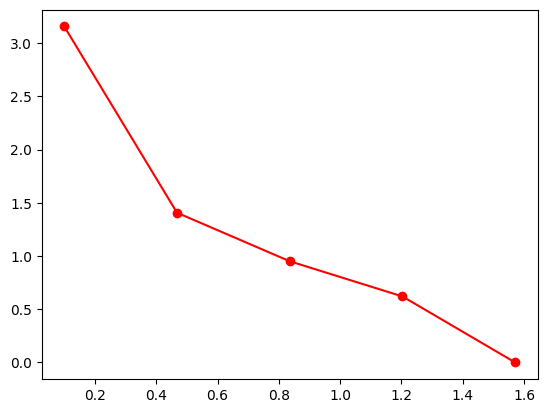

In [ ]:
#Gráfico
plt.figure()
plt.plot(x,f1(x),"ro-")
plt.show()

In [ ]:
#Cálculo de la integral
def integral_trapz(f1,a1,b1,N1):
    x=np.linspace(a1,b1,int(N1))
    h=(b1-a1)/N1
    A=(f1(x[0])+f1(x[-1])+ 2*f1(x[1:-1]).sum())*h*0.5
    return A

In [ ]:
#Area en terminos de la integral
A= integral_trapz(f1,0.1,1,N1=10)
print(A)

1.1757613767224433


In [ ]:
N=np.linspace(100,1000,10)
areas=np.zeros(len(N))
for i ,n_ in enumerate(N):
    areas[i]=integral_trapz(f1,0.1,1,n_)

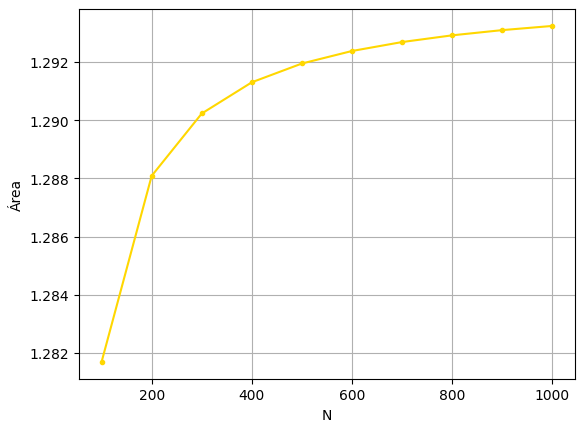

In [ ]:
plt.figure()
plt.plot(N,areas,".-",c="gold")
plt.xlabel("N")
plt.ylabel("Área")
plt.grid(True)
plt.show()

In [ ]:
#Comparación de los métodos
integralf1=integral_trapz(f1,a1,b1,1000)
print(f"Por medio de la deducción obtenemos que el cálculo de integral mediante trapecios es:{integralf1}")

xn_=np.linspace(a1,b1,1000)
intregral_met_trapz=sc.integrate.trapezoid(f1(xn_),xn_)
print(f"usando la librería trapezoid obtenemos que la integración es: {intregral_met_trapz}")

Por medio de la deducción obtenemos que el cálculo de integral mediante trapecios es:1.587598870026858
usando la librería trapezoid obtenemos que la integración es: 1.5891880580849427


**Escribir en código Markdown la expresión para calcular una integral con la regla del simpson**

1. **Define la función:** Define la función que quieres integrar
    
$$ \int_{-∞}^{∞} \frac{1}{1+x^2} dx $$

2. **Redefine los limites de integración:** Utilice el método de sustitución para cambiar los límites de integración de la función

$$\int_{-∞}^{∞} \frac{1}{1+x^2} dx = \int_{- π/2}^{π/2} \frac{1}{1+(tan(\theta))^2}* (sec(\theta))^2 d\theta = \int_{- π/2}^{π/2} \frac{1}{1+(tan(\theta))^2}* \frac{1}{(cos(\theta))^2} d\theta $$


3. **Define la función:** En este caso se define como "regla_simp_comp" que calculará la integral utilizando la regla de Simpson compuesta

    Haga uso de la siguiente la formula:

$$\int_{a}^{b} f(x)\, dx = \frac{h}{3}[f(a)+2 ∑_{j=1}^{n/2-1} f(x_{2j})+4 \sum_{j=1}^{n/2} f(x_{2j})+f(b)]$$


4. **Llama a la función:** Llame a la función con los parametros necesarios y almacena el resultado en una variable
5. **Resultado:** Muestra el resultado de la integral en consola  

In [ ]:
f2= lambda x:1/(1+x**2)

#Haga una sustitución para poder cambiar los limites de integración
def f_sustituida(theta):
    f_u=1/(1+np.tan(theta)**2)*(1/(np.cos(theta)**2))
    return f_u

#Defina los límites de integración en la variable u
a=-np.pi/2
b=np.pi/2
N=10000

In [ ]:
def regla_simp_comp(f_sustituida,a,b,N):
    xn3=np.linspace(a,b,int(N))
    h=xn3[1]-xn3[0]
    x2j_par=xn3[2:N-2:2]
    x2j_1_impar=xn3[1:N-1:2]
    I=(h/3)*(f_sustituida(a)+2*f_sustituida(x2j_par).sum()+4*f_sustituida(x2j_1_impar).sum()+f_sustituida(b))
    return I

integral_simp_comp=regla_simp_comp(f_sustituida,a,b,N)
integral_simp_comp

3.1412784629062114

**Escribir en código Markdown la expresión para calcular una integral con el Método de cuadratura**

1. **Define los parámetros iniciales y los limites de integración**

•Define los límites de integración respecto a x y y.

•Define una función a integrar en función de x y y.


2. **Definir una función para calcular la integral**

•Define una función llamada 'integral_1' que tomará la función a integrar, los valores de y y los limites de integración con respecto a x.

•Utiliza un bucle for para clacular la integral para calcular la integrak para cada valor de x y guardalos en un arreglo I.

3. **Calcular las integrales y Almacenar los resultados:** Usa la función integral_1 para calcular las integrales en función de x y guardarlas en un arreglo I

4. **Calcular la integral:** Usa "sc.integrate.simpson" para calcular a integral definifa de los resultados obtenidos en el paso anterior en función de x

5. **Resultado:** Muestra el valor de la integral definida

In [ ]:
#Parámetros iniciales
#Limites de integración respecto a
a_x=0
b_x=np.pi/4
x=np.linspace(a_x,b_x,100)

#Limites de integración con respecto a
a_y=np.sin(x)
b_y=np.cos(x)
y=np.linspace(a_y,b_y,100)

#Función a integrar
f3=lambda x,y: 2*y*np.sin(x)+np.cos(x)**2

In [ ]:
x_=np.zeros(len(x))
def integral_1(f3,x,a_x,b_x):
    for i in range(len(x)):
        intervalo1=np.linspace(np.sin(x),np.cos(x),100)
        I=sc.integrate.simpson(f3(intervalo1),intervalo1)
        I[i]=x_
    return I

In [ ]:
I=np.zeros(len(x))
for i in range(len(x)):
    intervalo1=np.linspace(np.sin(x[i]),np.cos(x[i]),100)
    a=sc.integrate.simpson(f3(x[i],intervalo1),intervalo1)
    I[i]=a

I

array([1.00000000e+00, 9.99905098e-01, 9.99618437e-01, 9.99137147e-01,
       9.98458448e-01, 9.97579646e-01, 9.96498138e-01, 9.95211412e-01,
       9.93717053e-01, 9.92012737e-01, 9.90096240e-01, 9.87965434e-01,
       9.85618292e-01, 9.83052887e-01, 9.80267394e-01, 9.77260093e-01,
       9.74029367e-01, 9.70573705e-01, 9.66891705e-01, 9.62982069e-01,
       9.58843612e-01, 9.54475255e-01, 9.49876032e-01, 9.45045088e-01,
       9.39981677e-01, 9.34685170e-01, 9.29155049e-01, 9.23390909e-01,
       9.17392461e-01, 9.11159529e-01, 9.04692052e-01, 8.97990085e-01,
       8.91053798e-01, 8.83883476e-01, 8.76479521e-01, 8.68842448e-01,
       8.60972890e-01, 8.52871593e-01, 8.44539420e-01, 8.35977348e-01,
       8.27186469e-01, 8.18167990e-01, 8.08923229e-01, 7.99453620e-01,
       7.89760709e-01, 7.79846153e-01, 7.69711722e-01, 7.59359294e-01,
       7.48790860e-01, 7.38008518e-01, 7.27014473e-01, 7.15811040e-01,
       7.04400637e-01, 6.92785788e-01, 6.80969119e-01, 6.68953362e-01,
      

In [ ]:
sc.integrate.simpson(I,x)

0.5118446374265215

Otra forma de verlo

In [ ]:
F=lambda x,y: 2*y*np.sin(x)+np.cos(x)**2
for i, x_ in  enumerate(x):
    y=np.linspace(np.cos(x_),np.sin(x_))
    I=np.linspace(np.cos(x_),np.sin(x_))
    I[i]=sc.integrate.simpson(F(x,y),y)


In [ ]:
sc.integrate.simpson(I,x)

0.5506379151671615

5. Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequenas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas. La anterior integral.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exact de la integral mostrado en el punto 5.

In [ ]:
import scipy as sc
import numpy as np
import matplotlib.pylab as plt

In [ ]:
#Datos iniciales
b=0.5        #m      Longitud
g=9.8        #m/s^2  gravedad
m=0.1        #kg     masa
I_0=83.33E-6 #Kg/m^2 momento de inercia


In [ ]:
#calculo del periodo
p0=2*np.pi*np.sqrt(I_0/(m*g*b))
p0

0.08193746419505879

In [ ]:
#Valores de theta y phi
theta0=np.linspace(np.deg2rad(0.1),np.deg2rad(45), 10)
phi=np.linspace(0,np.pi/2,1000)

In [ ]:
def integral_eliptica(theta0,phi):
    k= np.sin(theta0/2)
    s=(2*p0)/np.pi
    funcion_p=s*(1/(np.sqrt(1-(k)**2*(np.sin(phi)**2))))
    return funcion_p

#Intervalo de phi
phi=np.linspace(0,np.pi/2,1000)

#Definición del ciclo
integral=np.zeros(len(theta0))
for i,n_ in enumerate(theta0):
    x=sc.integrate.trapezoid(integral_eliptica(n_,phi),phi)
    integral[i]=x

integral


array([0.08193748, 0.08197788, 0.08209618, 0.08229299, 0.08256937,
       0.08292676, 0.08336712, 0.08389285, 0.0845069 , 0.08521278])

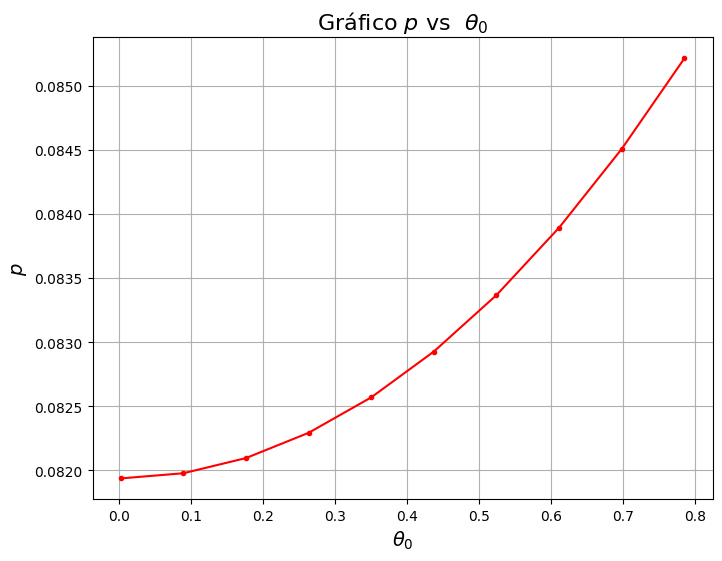

In [ ]:
#Gráfico
plt.figure(figsize=(8,6))
plt.plot(theta0,integral,".-r")
plt.xlabel("$ θ_0$", fontsize=14)
plt.ylabel("$p$", fontsize=14)
plt.title("Gráfico $p$ vs  $θ_0$", fontsize=16)
plt.grid()
plt.show()

In [ ]:
#Método integrate.quad
integral_quad=np.zeros(len(theta0))
error=np.zeros(len(theta0))

for i, n_ in enumerate(theta0):
    v=sc.integrate.quad(integral_eliptica,0,np.pi/2,args=(n_,))
    integral_quad[i]=v[0]
    error[i]=v[1]

print(integral_quad)
print(error)

[0.08193749 0.08199614 0.08216703 0.08244855 0.08283784 0.08333056
 0.08392056 0.08459941 0.08535585 0.08617516]
[9.09688845e-16 9.10340001e-16 9.12237330e-16 9.15362803e-16
 9.19684732e-16 9.25155042e-16 9.31705395e-16 9.39242158e-16
 9.47640286e-16 9.56736436e-16]


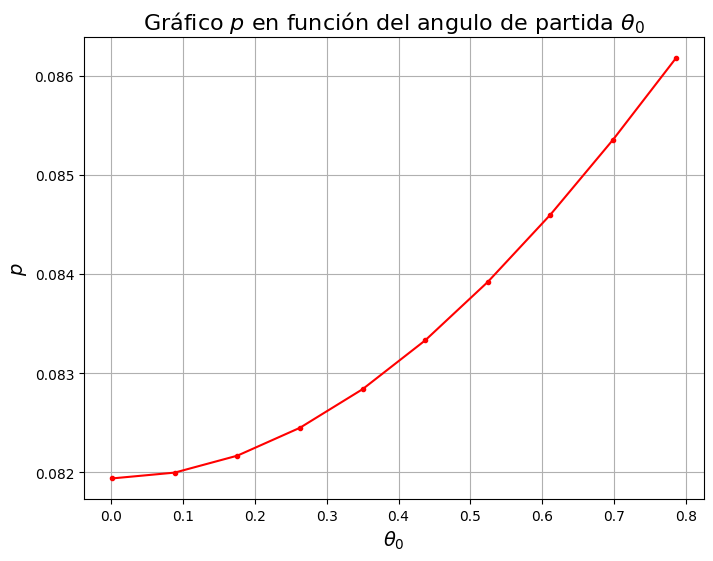

In [ ]:
#Gráfico
plt.figure(figsize=(8,6))
plt.plot(theta0,integral_quad,".-r")
plt.xlabel("$ θ_0$", fontsize=14)
plt.ylabel("$p$", fontsize=14)
plt.title("Gráfico $p$ en función del angulo de partida $θ_0$", fontsize=16)
plt.grid()
plt.show()